In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
rtRev_df = pd.read_csv('rt.reviews.tsv', delimiter='\t', encoding='latin1')
rtRev_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [3]:
#created new df without all the NaN values in rating column, dropped 13517 rows
cleaned_df = (rtRev_df[rtRev_df['rating'].notna()]).copy()
cleaned_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [4]:
cleaned_df.shape

(40915, 8)

In [5]:
#created a new df where all the rows have a letter as the value in the rating column
df_letters = rtRev_df[rtRev_df['rating'].isin(['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F+','F','F-','N','T','R'])].copy()
df_letters.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
13,3,The anger over the injustice of the financial ...,B,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013"
17,3,Its major problem is that it's not cinematic.,B,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 25, 2012"
34,3,I don't know if DeLillo's fetishized doubletal...,C,rotten,Vincent Mancini,0,FilmDrunk,"August 30, 2012"


In [6]:
df_letters.shape

(6468, 8)

In [7]:
#used the letters_df to rid the letters from the no-Nan cleaned_df
cleaned_df.drop(cleaned_df[cleaned_df['rating'].isin(df_letters['rating'])].index, inplace=True)
cleaned_df.shape


(34447, 8)

In [8]:
cleaned_df['rating'].unique()

array(['3/5', '2/5', '2/4', '3/4', '4/5', '4/4', '6/10', '1/4', '8',
       '2.5/4', '4/10', '2.0/5', '3/10', '7/10', '5/5', '3.5/4', '1.5/4',
       '3.5/5', '8/10', '9/10', '2.5/5', '7.5/10', '5.5/10', '1.5/5',
       '1/5', '5/10', '0/5', '6', '0.5/4', '3.1/5', '3/6', '4.5/5', '0/4',
       '2/10', '7', '1/10', '3', '4.0/4', '9.5/10', '2.5', '2.1/2',
       '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5', '0.5/10',
       '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5', '0.5/5',
       '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5', '8.6/10',
       '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10', '5/4',
       '3.5/10', '5.8/10', '4.0/5', '0/10', '5.0/10', '5.9/10', '2.4/5',
       '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4', '8.8/10', '4.0/10',
       '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10', '3.2', '4.2', '8.4',
       '5.5/5', '6.3/10', '7.6/10', '8.1/10', '3.6/5', '2/6', '7.7/10',
       '1.8', '8.9/10', '8.9', '8.2/10', '8.3/10', '2.6/6', '4.1/10',
 

In [9]:
#get list of string data values from rating column
values = []
for rating_value in cleaned_df['rating']:
    values.append(rating_value)

#partition and convert string values to float, interpreted the 1-5 as 1.5
to_num = []
for item in values:
    if item == '3 1/2':
        to_num.append(3.5)
    elif '/' in item:
        x = item.partition('/')
        to_num.append(float(x[0]))
    elif item == '1-5':
        to_num.append(1.5)
    else:
        to_num.append(float(item))

#rating should be 0-5 so half any ratings that are above 5, overall 3044 ratings over 5
five_rating = []
for element in to_num:
    if element > 5:
        y = element/2
        five_rating.append(y)
    else:
        five_rating.append(element)

#add new column 'cleaned_rating' w cleaned ratings   
cleaned_df['cleaned_rating'] = five_rating
cleaned_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,cleaned_rating
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3.0
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2.0
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2.0
14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012",3.0
15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012",3.0


In [10]:
#get the median for new_rating grouped by the movie id, also shows there are 1077 unique values in id column
group = cleaned_df.groupby(['id']).median()
group.drop(['top_critic'], axis=1, inplace=True)
group

,cleaned_rating
id,
3,3.00
5,3.00
6,3.00
8,3.00
10,3.00
...,...
1996,3.00
1997,2.00
1998,3.00


In [11]:
#merge df with letters rating with the df with the median for new_rating, dropped 47 rows as those 47 had an
#id whose value in the rating (original) was only ever a letter i.e. no way to calculate a median
combined = df_letters.merge(group, how='inner', on='id')
combined

,id,review,rating,fresh,critic,top_critic,publisher,date,cleaned_rating
0,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",3.00
1,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",3.00
2,3,The anger over the injustice of the financial ...,B,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013",3.00
3,3,Its major problem is that it's not cinematic.,B,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 25, 2012",3.00
4,3,I don't know if DeLillo's fetishized doubletal...,C,rotten,Vincent Mancini,0,FilmDrunk,"August 30, 2012",3.00
...,...,...,...,...,...,...,...,...,...
6416,2000,If you sometimes like to go to the movies to h...,A,fresh,Edward Havens,0,FilmJerk.com,"October 12, 2002",2.25
6417,2000,"May lack the pungent bite of its title, but it...",C+,fresh,Marshall Fine,0,"Journal News (Westchester, NY)","October 5, 2002",2.25
6418,2000,Wasabi does its job colorfully and entertainin...,C+,fresh,Sean Axmaker,0,Seattle Post-Intelligencer,"October 3, 2002",2.25
6419,2000,"Slight, but colorful and forward-moving... Was...",C+,fresh,Brent Simon,0,Entertainment Today,"September 30, 2002",2.25


In [12]:
#use concat to join cleaned_df (which has the cleaned_rating column) with the combined df (which has 
#median value for letter ratings as cleaned_rating) since combined has rows earlier dropped from cleaned_df
all_data = pd.concat([cleaned_df, combined])
all_data.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,cleaned_rating
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3.0
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2.0
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2.0
14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012",3.0
15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012",3.0


In [13]:
#df with movie info, use to obtain genres
rt_df = pd.read_csv('rt.movie_info.tsv', delimiter='\t') 
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [14]:
rt_df.shape

(1560, 12)

In [15]:
#merged the all_data df w the rotten tomatoes movie info df on the id column to get genres
w_genres_df = all_data.merge(rt_df, how='left', on='id')
w_genres_df.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,cleaned_rating,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012",3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012",3.0,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [16]:
#dropped columns that seemed superfluous, shape = (40868,14)
w_genres_df.drop(labels=['critic','publisher','top_critic','rating_y','dvd_date','studio'],axis=1, inplace=True)
w_genres_df.head()

,id,review,rating_x,fresh,date,cleaned_rating,synopsis,genre,director,writer,theater_date,currency,box_office,runtime
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,"November 10, 2018",3.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes
1,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,"April 21, 2013",2.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes
2,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,"January 15, 2013",2.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes
3,3,For those who like their Cronenberg thick and ...,3/4,fresh,"October 20, 2012",3.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes
4,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,"September 27, 2012",3.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes


In [17]:
w_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40868 entries, 0 to 40867
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              40868 non-null  int64  
 1   review          35334 non-null  object 
 2   rating_x        40868 non-null  object 
 3   fresh           40868 non-null  object 
 4   date            40868 non-null  object 
 5   cleaned_rating  40868 non-null  float64
 6   synopsis        40763 non-null  object 
 7   genre           40792 non-null  object 
 8   director        36656 non-null  object 
 9   writer          33898 non-null  object 
 10  theater_date    39985 non-null  object 
 11  currency        25538 non-null  object 
 12  box_office      25538 non-null  object 
 13  runtime         40250 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 4.7+ MB


In [18]:
#made a copy of w_genres_df and dropped the rows with NaN values in genre column
filled_genres = w_genres_df.dropna(subset=['genre']).copy()
filled_genres.head()

,id,review,rating_x,fresh,date,cleaned_rating,synopsis,genre,director,writer,theater_date,currency,box_office,runtime
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,"November 10, 2018",3.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes
1,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,"April 21, 2013",2.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes
2,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,"January 15, 2013",2.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes
3,3,For those who like their Cronenberg thick and ...,3/4,fresh,"October 20, 2012",3.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes
4,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,"September 27, 2012",3.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes


In [19]:
#separate the grouped genres in the genre column into individual genres
separated = []
word = ''
for genre in filled_genres['genre']:
    counter = genre.count('|') + 1
    word = genre
    while counter > 0:
        part = word.partition('|')
        separated.append(part[0])
        word = part[2]
        counter -= 1



In [20]:
#get a list of the unique genres 
distinct = set(separated)
distinct

{'Action and Adventure',
 'Animation',
 'Anime and Manga',
 'Art House and International',
 'Classics',
 'Comedy',
 'Cult Movies',
 'Documentary',
 'Drama',
 'Faith and Spirituality',
 'Gay and Lesbian',
 'Horror',
 'Kids and Family',
 'Musical and Performing Arts',
 'Mystery and Suspense',
 'Romance',
 'Science Fiction and Fantasy',
 'Special Interest',
 'Sports and Fitness',
 'Television',
 'Western'}

In [21]:
#get boolean values for each movie for each distinct genre, will be in a list of lists
genre_by_row = []
for item in distinct:
    distinct_values = []
    for genre in filled_genres['genre']:
        if item in genre:
            distinct_values.append(True)
        else:
            distinct_values.append(False)
    genre_by_row.append(distinct_values)
        

In [22]:
len(genre_by_row)

21

In [23]:
len(distinct)

21

In [24]:
#assign boolean values to distinct genre columns to add to filled_genre df
index = 0
for item in distinct:
    filled_genres[item] = genre_by_row[index]
    index += 1
    
filled_genres.head()

,id,review,rating_x,fresh,date,cleaned_rating,synopsis,genre,director,writer,...,Comedy,Art House and International,Kids and Family,Horror,Television,Science Fiction and Fantasy,Romance,Anime and Manga,Faith and Spirituality,Classics
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,"November 10, 2018",3.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,...,False,False,False,False,False,True,False,False,False,False
1,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,"April 21, 2013",2.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,...,False,False,False,False,False,True,False,False,False,False
2,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,"January 15, 2013",2.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,...,False,False,False,False,False,True,False,False,False,False
3,3,For those who like their Cronenberg thick and ...,3/4,fresh,"October 20, 2012",3.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,...,False,False,False,False,False,True,False,False,False,False
4,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,"September 27, 2012",3.0,"New York City, not-too-distant-future: Eric Pa...",Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,...,False,False,False,False,False,True,False,False,False,False


In [25]:
def rate_round(rate):
    return round(rate)

In [26]:
#create df with genres, rating, and theater date, drop superfluous columns, change cleaned_rating to Rating, round
#ratings, drop rows with NaN in theater_date column
genres_w_date = filled_genres.copy()
genres_w_date.drop(labels = ['id', 'review', 'rating_x', 'fresh', 'genre', 'runtime', 'Television', 'director',
                  'synopsis', 'writer', 'date'], axis=1, inplace=True)
genres_w_date.rename(columns = {'cleaned_rating':'Rating'}, inplace=True)
genres_w_date.Rating = genres_w_date.Rating.apply(rate_round)
genres_w_date.dropna(subset = ['theater_date'], inplace=True)

In [27]:
def get_year(date):
    date = date.replace('\n','')
    date = date.strip()
    year = int(date[-4:])
    return year

In [28]:
genres_w_date.theater_date.unique()

array(['Aug 17, 2012', 'Sep 13, 1996', 'Dec 9, 1994', 'Mar 3, 2000',
       'Jan 11, 2002', 'Apr 27, 2006', 'Jun 30, 2010', 'Jun 9, 1995',
       'Aug 23, 2002', 'Dec 22, 1968', 'Jan 31, 1997', 'Dec 20, 2013',
       'Nov 6, 1987', 'Dec 25, 2013', 'May 14, 2004', 'Jun 15, 1966',
       'Nov 1, 1996', 'Dec 31, 2000', 'Jul 30, 1999', 'Dec 23, 1970',
       'Sep 19, 2003', 'May 16, 2003', 'Mar 11, 2003', 'Aug 13, 1997',
       'Oct 26, 1967', 'Apr 21, 1995', 'Nov 15, 2013', 'Oct 6, 1995',
       'Nov 21, 2012', 'Jan 27, 1984', 'Jan 1, 1987', 'Feb 10, 2006',
       'Mar 26, 1997', 'Aug 21, 1998', 'Nov 21, 2007', 'Jan 17, 2014',
       'Sep 21, 1940', 'Jun 12, 1981', 'May 14, 1986', 'Apr 6, 1965',
       'Jul 1, 2011', 'May 19, 1995', 'Dec 3, 1987', 'Jan 19, 2001',
       'Aug 20, 2010', 'Jul 24, 1998', 'Jan 1, 1966', 'Nov 3, 1939',
       'Nov 18, 2016', 'Dec 20, 2002', 'Apr 16, 2010', 'Dec 25, 1946',
       'Nov 24, 1999', 'Sep 10, 1989', 'Dec 25, 1999', 'Aug 7, 1998',
       'Jul 30, 199

In [29]:
#genres_w_date['Year'] = genres_w_date[genres_w_date['theater_date']].apply(get_year)
#genres_w_date.columns

In [30]:
#drop more superfluous columns
filled_genres.drop(labels=['review','synopsis','director','writer', 'date'],axis=1, inplace=True)
filled_genres.head()

,id,rating_x,fresh,cleaned_rating,genre,theater_date,currency,box_office,runtime,Special Interest,...,Comedy,Art House and International,Kids and Family,Horror,Television,Science Fiction and Fantasy,Romance,Anime and Manga,Faith and Spirituality,Classics
0,3,3/5,fresh,3.0,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,False,...,False,False,False,False,False,True,False,False,False,False
1,3,2/5,rotten,2.0,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,False,...,False,False,False,False,False,True,False,False,False,False
2,3,2/4,rotten,2.0,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,False,...,False,False,False,False,False,True,False,False,False,False
3,3,3/4,fresh,3.0,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,False,...,False,False,False,False,False,True,False,False,False,False
4,3,3/5,fresh,3.0,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,False,...,False,False,False,False,False,True,False,False,False,False


In [31]:
filled_genres.columns

Index(['id', 'rating_x', 'fresh', 'cleaned_rating', 'genre', 'theater_date',
       'currency', 'box_office', 'runtime', 'Special Interest',
       'Gay and Lesbian', 'Sports and Fitness', 'Action and Adventure',
       'Documentary', 'Cult Movies', 'Drama', 'Animation',
       'Mystery and Suspense', 'Western', 'Musical and Performing Arts',
       'Comedy', 'Art House and International', 'Kids and Family', 'Horror',
       'Television', 'Science Fiction and Fantasy', 'Romance',
       'Anime and Manga', 'Faith and Spirituality', 'Classics'],
      dtype='object')

In [32]:
#df with just cleaned_rating and individual genres for visuals
filled_genres.drop(labels=['id', 'rating_x', 'fresh', 'genre', 'theater_date', 'currency', 'box_office', 'runtime'], axis=1, inplace=True)
filled_genres.rename(columns = {'cleaned_rating': 'Rating'}, inplace=True)

In [33]:
filled_genres.head()

,Rating,Special Interest,Gay and Lesbian,Sports and Fitness,Action and Adventure,Documentary,Cult Movies,Drama,Animation,Mystery and Suspense,...,Comedy,Art House and International,Kids and Family,Horror,Television,Science Fiction and Fantasy,Romance,Anime and Manga,Faith and Spirituality,Classics
0,3.0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2.0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2.0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,3.0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,3.0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [34]:
#dropped rows with television rating and then the television column as only want movies and round ratings 
no_tv = filled_genres.drop(filled_genres[filled_genres['Television'] == True].index)
no_tv.drop(labels='Television', axis=1, inplace=True)
no_tv.Rating = no_tv.Rating.apply(rate_round)

In [35]:
no_tv.Rating.unique()

array([3, 2, 4, 1, 5, 0])

In [36]:
#df with highest ratings (4-5)
high_rate = no_tv.drop(no_tv[no_tv['Rating'] < 4.0].index)
high_rate.Rating.unique()

array([4, 5])

In [37]:
#df with mid (3) ratings 
mid_rate = no_tv.drop(no_tv[no_tv['Rating'] < 3.0].index)
mid_rate.drop(mid_rate[mid_rate['Rating'] >= 4.0].index, inplace=True)
mid_rate.Rating.unique()

array([3])

In [38]:
#df with low ratings (0-2)
low_rate = no_tv.drop(no_tv[no_tv['Rating'] >= 3].index)
low_rate.Rating.unique()

array([2, 1, 0])

Number of high ratings: 13964


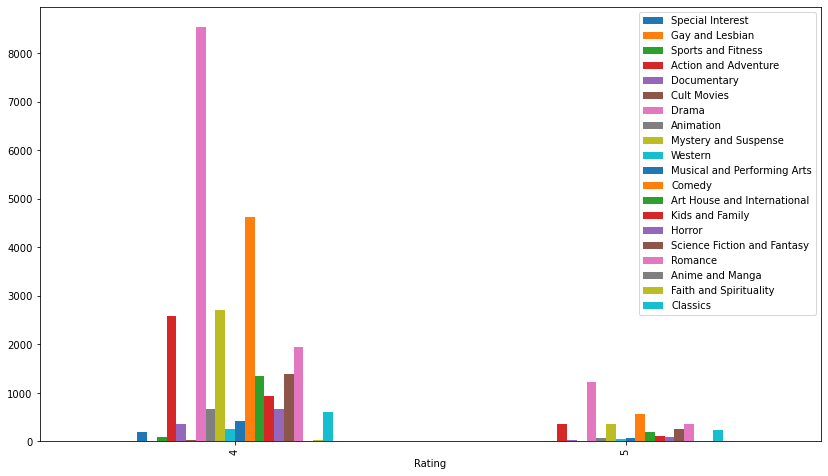

In [39]:
#plot highest ratings (4 & 5) of all genres
high_sum = high_rate.groupby(['Rating']).sum()
high_sum
print('Number of high ratings:', len(high_rate))
high_sum.plot.bar(figsize=(14,8));

Number of 4 ratings: 12261


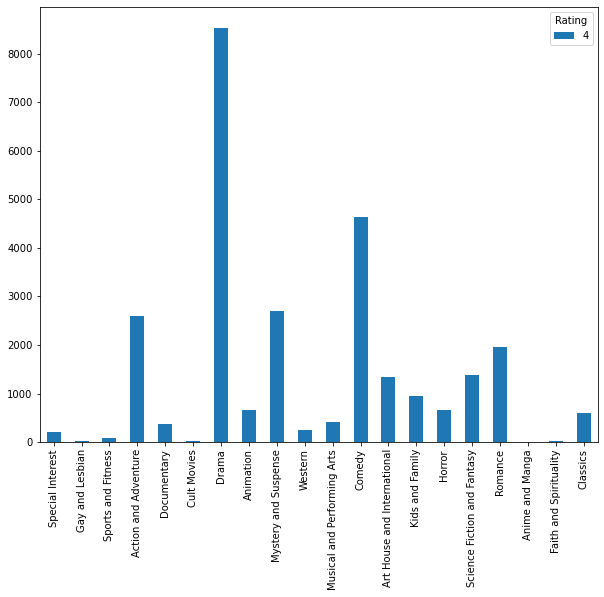

In [40]:
#create df of 4 ratings and plot
high4 = high_rate[high_rate['Rating']==4.00]
high4_sum = high4.groupby(['Rating']).sum()
print('Number of 4 ratings:',len(high4))
(high4_sum.T).plot.bar(figsize=(10,8));

Number of 5 ratings: 1703


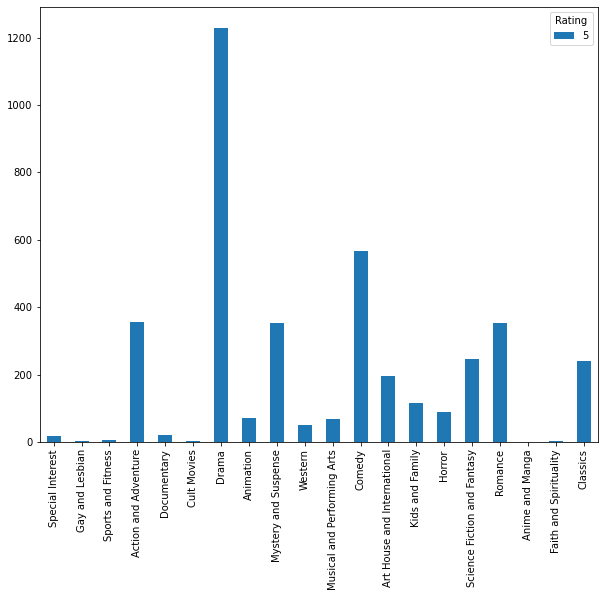

In [41]:
#create df of 5 ratings of all genres and plot
high5 = high_rate[high_rate['Rating']==5.00]
high5_sum = high5.groupby(['Rating']).sum()
print('Number of 5 ratings:', len(high5))
(high5_sum.T).plot.bar(figsize=(10,8));

Number of average ratings: 11103


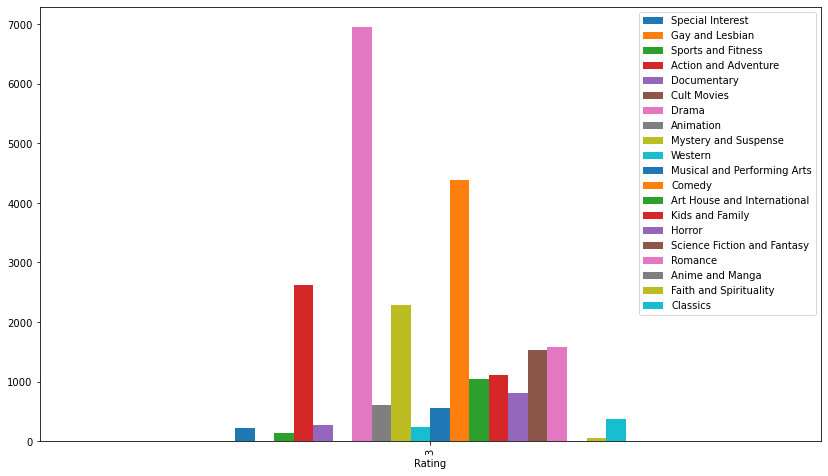

In [42]:
#create df of sum of mid rating (3) for all genres and plot
mid_sum = mid_rate.groupby(['Rating']).sum()
print('Number of average ratings:', len(mid_rate))
mid_sum.plot.bar(figsize=(14,8));

Number of ratings of 3: 11103


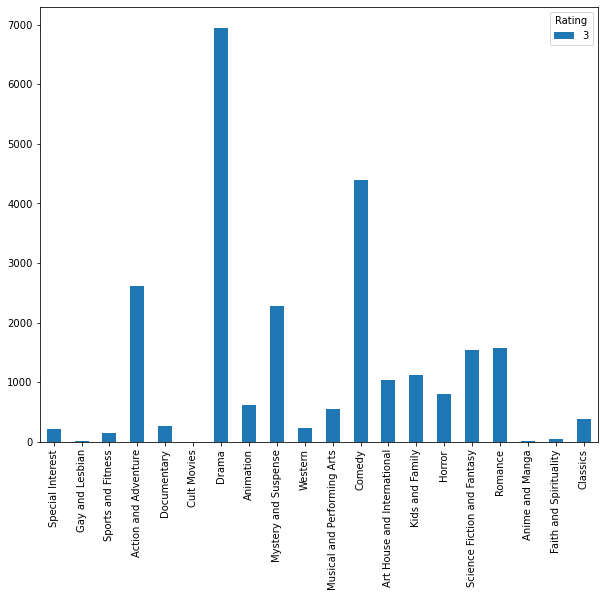

In [43]:
#create df of mid rating and plot
rate3 = mid_rate[mid_rate['Rating']==3.00]
rate3_sum = rate3.groupby(['Rating']).sum()
print('Number of ratings of 3:', len(rate3))
(rate3_sum.T).plot.bar(figsize=(10,8));

Number of low ratings: 15567


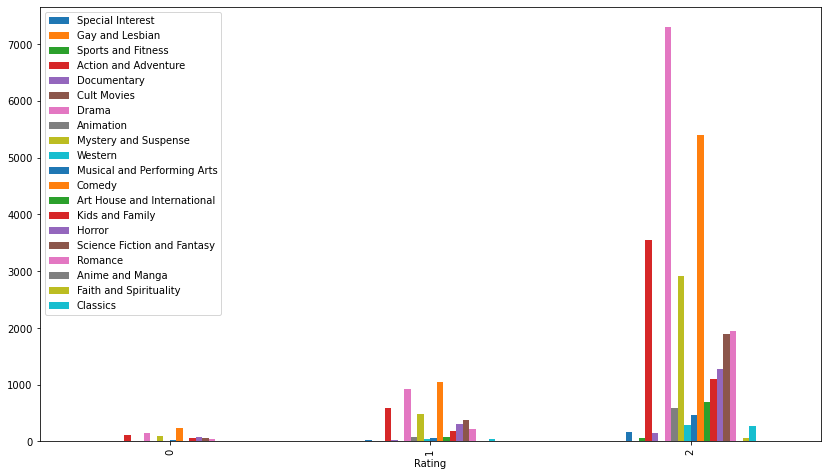

In [44]:
print('Number of low ratings:', len(low_rate))
low_rate_sum = low_rate.groupby(["Rating"]).sum()
low_rate_sum.plot.bar(figsize=(14,8));

In [45]:
#create df of 10 genres with highest frequency of top rating
all_high = high_rate.copy()
all_high.Rating = all_high.Rating.apply(lambda x: 5)
all_high_sum = all_high.groupby(['Rating']).sum()
top10_high = all_high_sum.T.sort_values(by=5, ascending=False)[:10]

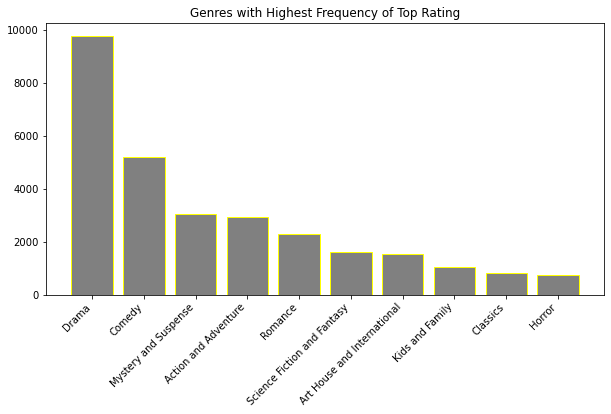

In [46]:
#plot top ten genres with highest frequency of top rating
fig, ax1 = plt.subplots(figsize=(10,5));

ax1.bar(x=top10_high.index, height=top10_high[5], color='grey', edgecolor='yellow');
plt.xticks(rotation=45, ha='right');
ax1.set_title('Genres with Highest Frequency of Top Rating');

In [47]:
#create df of 10 genres of with highest frequency of average rating
all_mid_sum = mid_rate.groupby(['Rating']).sum()
top10_mid = all_mid_sum.T.sort_values(by=3, ascending=False)[:10]

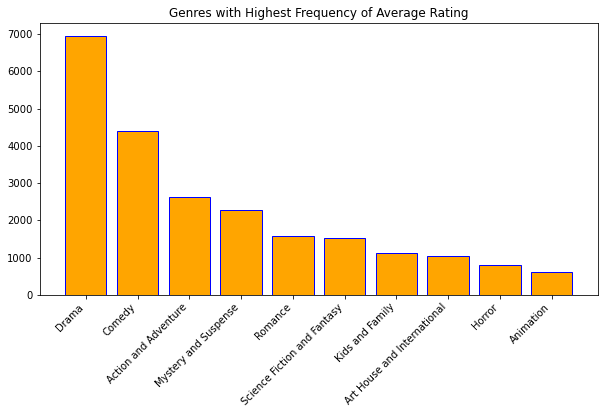

In [48]:
#plot top ten genres with highest frequency of average rating
fig, ax2 = plt.subplots(figsize=(10,5));

ax2.bar(x=top10_mid.index, height=top10_mid[3], color='orange', edgecolor='blue');
plt.xticks(rotation=45, ha='right');
ax2.set_title('Genres with Highest Frequency of Average Rating');

In [49]:
#create df of top 10 genres with highest frequency of low rating
all_low = low_rate.copy()
all_low.Rating = all_low.Rating.apply(lambda x : 1)
all_low_sum = all_low.groupby(['Rating']).sum()
top10_low = all_low_sum.T.sort_values(by=1, ascending=False)[:10]

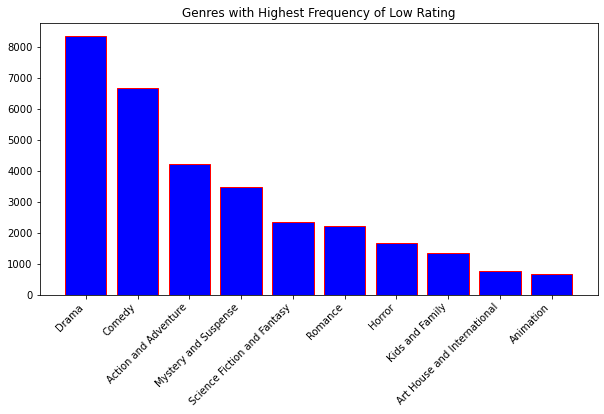

In [50]:
#plot top ten genres with highest frequency of low rating
fig, ax = plt.subplots(figsize=(10,5));

ax.bar(x=top10_low.index, height=top10_low[1], color='blue', edgecolor='red');
plt.xticks(rotation=45, ha='right');
ax.set_title('Genres with Highest Frequency of Low Rating');

In [51]:
#create dfs for low ratings (1,2, &3)
low0 = low_rate[low_rate['Rating']== 0]
low1 = low_rate[low_rate['Rating'] == 1]
low2 = low_rate[low_rate['Rating'] == 2]

Number of 0 ratings: 454


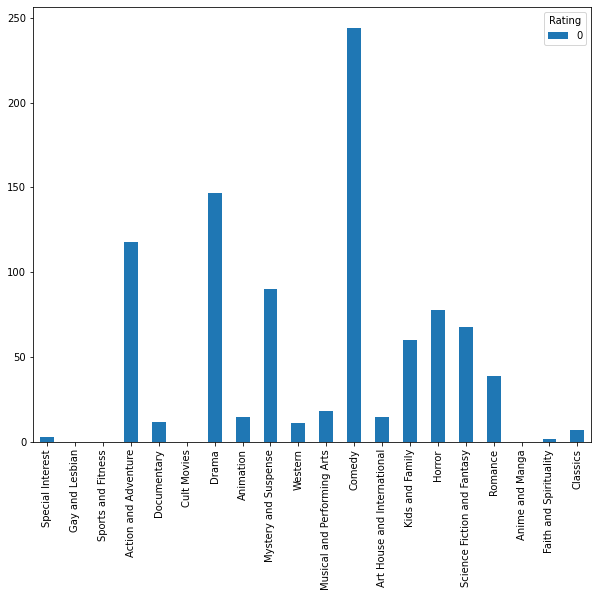

In [52]:
#create sum df of 0 ratings and plot
low0_sum = low0.groupby(['Rating']).sum()
print('Number of 0 ratings:', len(low0))
(low0_sum.T).plot.bar(figsize=(10,8));

Number of 1 ratings: 2166


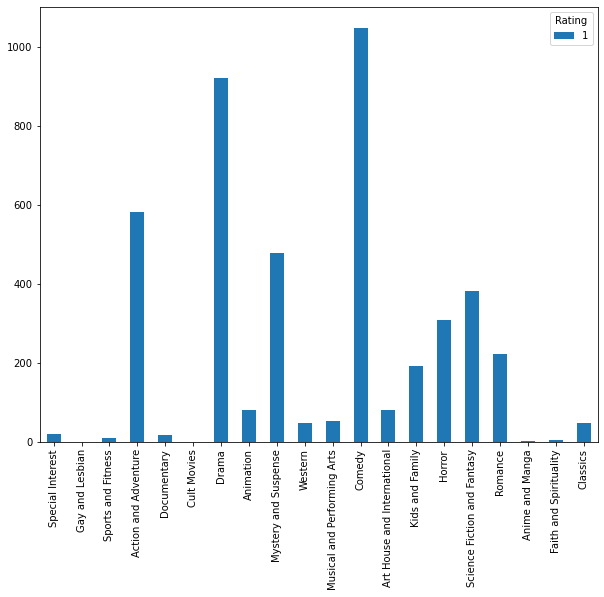

In [53]:
#create sum df of 1 ratings and plot
low1_sum = low1.groupby(['Rating']).sum()
print('Number of 1 ratings:', len(low1))
(low1_sum.T).plot.bar(figsize=(10,8));

Number of 2 ratings: 12947


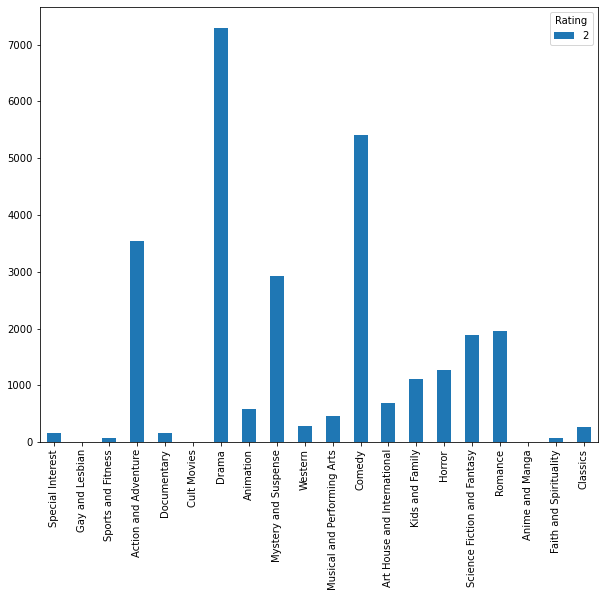

In [54]:
#create sum df of 2 ratings and plot
low2_sum = low2.groupby(['Rating']).sum()
print('Number of 2 ratings:', len(low2))
(low2_sum.T).plot.bar(figsize=(10,8));